ReadMe:

Question 1 is answered in part 1. (unfinished)

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys
%cd /content/drive/My\ Drive/Winter\ 2022/CME241

Mounted at /content/drive
/content/drive/My Drive/Winter 2022/CME241


In [17]:
from rl.distribution import *
from rl.markov_process import *
from rl.markov_decision_process import *
from rl.policy import *

import matplotlib.pyplot as plt

In [2]:
from rl.chapter9.order_book import *

#1. Order Book Dynamics

First, we will try to investigate on how the class OrderBook works. 

Let us consider a simple example, where the orderbook is small. Says the orderbook contains 
1. descending_bids = [(4.00, 2), (3.70, 3), (2.10, 1)]
2. ascending_asks = [(4.05, 4), (4.3, 7)]

In [35]:
descending_bids = [DollarsAndShares(dollars=4.00, shares=2), DollarsAndShares(dollars=3.70, shares=3), DollarsAndShares(dollars=2.10, shares=1)]
ascending_asks = [DollarsAndShares(dollars=4.05, shares=4), DollarsAndShares(dollars=4.30, shares=7)]

From the bids and asks, we can create an orderbook

In [36]:
Book = OrderBook(descending_bids=descending_bids, ascending_asks=ascending_asks)

Bid Price:  4.0
Ask Price:  4.05
Mid Price:  4.025
Spread:  0.04999999999999982
Depth:  2.1999999999999997


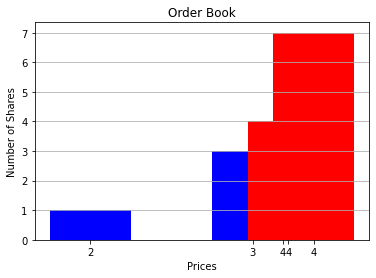

In [37]:
print('Bid Price: ', Book.bid_price())
print('Ask Price: ', Book.ask_price())
print('Mid Price: ', Book.mid_price())
print('Spread: ', Book.bid_ask_spread())
print('Depth: ', Book.market_depth())

Book.display_order_book()

If we try to push a sell limit order (ask) for a price higher than the (highest) bids, the transaction will not occur and the sell limit order will be added into the ascending_asks in the orderbook.

In [38]:
Book.descending_bids

[DollarsAndShares(dollars=4.0, shares=2),
 DollarsAndShares(dollars=3.7, shares=3),
 DollarsAndShares(dollars=2.1, shares=1)]

In [39]:
Book.sell_limit_order(price = 8.00, shares=3)[0]

DollarsAndShares(dollars=0.0, shares=0)

If we push a sell limit order cheaper than the bids, the bids will be eaten until the best bid is lower than the sell limit order price. The price that the seller will get is the price in the limit order book.

In [41]:
Book.sell_limit_order(price = 3.00, shares=8)[0]

DollarsAndShares(dollars=19.1, shares=5)

Next, we try to use market order.

In [42]:
Book.sell_market_order(shares=8)[0]

DollarsAndShares(dollars=21.200000000000003, shares=6)

##Simple Model

We first consider a simple model of the double auction seen in the limited order book. We will first consider the case when the inputing limit orders and market orders are iid. (suggested by the paper "Statistical Theory of the Continuous Double Auction").

Thus, we can assume that the sell market order is poisson with a parameter $\lambda_a$, and the buy market order is poisson with a parameter $\lambda_b$